In [3]:
# Загружаем библиотеки 
import random as random
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors 

%matplotlib inline 

In [4]:
# Функция получения выжившей популяции
def getSurvPopul(popul, val, nsurv, reverse):
    newpopul = [] 
    sval = sorted(val, reverse=reverse)   
    for i in range(nsurv):
        index = val.index(sval[i])
        newpopul.append(popul[index])
    return newpopul, sval

# Функция получения родителей
def getParents(curr_popul, nsurv):
    indexp1 = random.randint(0, nsurv - 1) 
    indexp2 = random.randint(0, nsurv - 1)   
    botp1 = curr_popul[indexp1] 
    botp2 = curr_popul[indexp2]   
    return botp1, botp2

# Функция смешивания (кроссинговера) двух родителей
def crossPointFrom2Parents(botp1, botp2, j):       
    pindex = random.random()
    if pindex < 0.5:
        x = botp1[j]
    else:
        x = botp2[j]
    return x

Размер Популяция = 100; Коэфициент Мутации = 0,15; Количество Выживших = 10

In [5]:
n = 100 # Размер популяции
nsurv = 10 # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv # Количество новых (столько новых ботов создается)
l = 12 # Длина бота
epohs = 500 # Количество эпох
mut = 0.15 # Коэфициент мутаций
# *******************
popul = [] # Двумерный массив популяции, размерностью [n, l]. 100 ботов по 12 компонентов каждый
val = [] # Одномерный массив значений этих ботов

for i in range(n):
    popul.append([])
    for j in range(l):
        popul[i].append(random.random()) 

# *******************
for it in range(epohs):
    val = []
    for i in range(n-1):
        bot = popul[i]
        x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]
        y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7]
        z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]
        # для кодирования применяем эту функцию f = x^2/y + z*(12-z) + 5*y/x
        f = x**2/2 + z*(12-z) + 5*y/x  
        val.append(abs(f))

    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Получаем новую популяцию и сортированный список значнией
    print(it, " ", [round(s,4) for s in sval[0:5]]) # Выводим 5 лучших ботов
 
    for i in range(nnew): # Проходимся в цикле nnew-раз 
        botp1, botp2 = getParents(newpopul, nsurv) # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = [] # Массив для нового бота
        # проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
        for j in range(l): # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j) # Получаем значение для j-ого компонента бота
            x += mut*(2*random.random() - 1.0) #Добавялем к значению бота случайную величину, зависящую от коэфециента мутации        
            newbot.append(x) # Добавялем новое значение в бота      
        newpopul.append(newbot) # Добавляем бота в новую популяцию 
        #(таким образом к nsurv-лучших ботов предыдующей популяции добавится nnew-новых ботов)
    
    popul = newpopul # Записываем в popul посчитанную новую популяцию

bot = popul[0] # Берем первого (лучшего) бота в финальной популяции
x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]
y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] 
z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]
f = x**2/2 + z*(12-z) + 5*y/x   # Считаем значение функции
print(f"Бот: {bot}")  
print(f'x ={round(x, 4)} y ={round(y, 4)} z ={round(z, 4)}')
print(f"f ={round(f, 6)}") # Выводим значение функции (которое должно быть максимально близко к 0 по условию задачи)

data = [[n, mut, nsurv, f]]

0   [1.0684, 1.4432, 1.9425, 8.2659, 12.5361]
1   [1.0684, 1.4432, 1.9425, 3.4132, 4.062]
2   [1.0684, 1.4432, 1.9425, 2.6623, 3.4132]
3   [0.1698, 1.0684, 1.4432, 1.9425, 2.4935]
4   [0.1698, 1.0684, 1.4432, 1.4938, 1.6252]
5   [0.1698, 1.0684, 1.4432, 1.4938, 1.6252]
6   [0.1698, 0.9443, 1.0684, 1.4432, 1.4938]
7   [0.1698, 0.9443, 1.0684, 1.4432, 1.4938]
8   [0.1698, 0.9013, 0.9443, 1.0684, 1.4432]
9   [0.1698, 0.9013, 0.9443, 1.0684, 1.4432]
10   [0.0149, 0.1698, 0.2676, 0.3268, 0.8459]
11   [0.0149, 0.1698, 0.2676, 0.3268, 0.8459]
12   [0.0149, 0.1698, 0.2676, 0.3268, 0.8459]
13   [0.0149, 0.1698, 0.2676, 0.3268, 0.8459]
14   [0.0149, 0.1698, 0.2676, 0.3268, 0.6365]
15   [0.0149, 0.1698, 0.2676, 0.3268, 0.6365]
16   [0.0149, 0.1698, 0.2676, 0.3268, 0.6365]
17   [0.0149, 0.1698, 0.2676, 0.3268, 0.6365]
18   [0.0149, 0.0537, 0.1698, 0.2676, 0.3268]
19   [0.0149, 0.0537, 0.1698, 0.2676, 0.3268]
20   [0.0149, 0.0537, 0.0656, 0.1698, 0.2676]
21   [0.0149, 0.0537, 0.0656, 0.1698, 0.2676

Размер Популяция = 200; Коэфициент Мутации = 0,25; Количество Выживших = 20

In [6]:
n = 200 # Размер популяции
nsurv = 20 # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv # Количество новых (столько новых ботов создается)
l = 12 # Длина бота
epohs = 500 # Количество эпох
mut = 0.25 # Коэфициент мутаций
# *******************
popul = [] # Двумерный массив популяции, размерностью [n, l]. 100 ботов по 12 компонентов каждый
val = [] # Одномерный массив значений этих ботов

for i in range(n):
    popul.append([])
    for j in range(l):
        popul[i].append(random.random()) 

# *******************
for it in range(epohs):
    val = []
    for i in range(n-1):
        bot = popul[i]
        x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]
        y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7]
        z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]
        # для кодирования применяем эту функцию f = x^2/y + z*(12-z) + 5*y/x
        f = x**2/2 + z*(12-z) + 5*y/x  
        val.append(abs(f))

    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Получаем новую популяцию и сортированный список значнией
    print(it, " ", [round(s,4) for s in sval[0:5]]) # Выводим 5 лучших ботов
 
    for i in range(nnew): # Проходимся в цикле nnew-раз 
        botp1, botp2 = getParents(newpopul, nsurv) # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = [] # Массив для нового бота
        # проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
        for j in range(l): # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j) # Получаем значение для j-ого компонента бота
            x += mut*(2*random.random() - 1.0) #Добавялем к значению бота случайную величину, зависящую от коэфециента мутации        
            newbot.append(x) # Добавялем новое значение в бота      
        newpopul.append(newbot) # Добавляем бота в новую популяцию 
        #(таким образом к nsurv-лучших ботов предыдующей популяции добавится nnew-новых ботов)
    
    popul = newpopul # Записываем в popul посчитанную новую популяцию

bot = popul[0] # Берем первого (лучшего) бота в финальной популяции
x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]
y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] 
z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]
f = x**2/2 + z*(12-z) + 5*y/x   # Считаем значение функции
print(f"Бот: {bot}")  
print(f'x ={round(x, 4)} y ={round(y, 4)} z ={round(z, 4)}')
print(f"f ={round(f, 6)}") # Выводим значение функции (которое должно быть максимально близко к 0 по условию задачи)

data = data + [[n, mut, nsurv, f]]

0   [3.1613, 4.8089, 6.7942, 7.8615, 8.368]
1   [0.0062, 1.535, 1.5675, 3.1613, 4.8089]
2   [0.0062, 1.535, 1.5675, 2.0885, 3.1613]
3   [0.0062, 0.1587, 0.839, 1.535, 1.5675]
4   [0.0062, 0.1587, 0.3195, 0.839, 1.0696]
5   [0.0062, 0.1587, 0.3195, 0.839, 1.0696]
6   [0.0062, 0.1587, 0.3195, 0.839, 1.0696]
7   [0.0062, 0.1587, 0.3195, 0.839, 1.0696]
8   [0.0062, 0.1587, 0.3195, 0.839, 1.0696]
9   [0.0062, 0.1199, 0.1587, 0.3195, 0.839]
10   [0.0062, 0.1199, 0.1587, 0.3195, 0.839]
11   [0.0062, 0.1199, 0.1587, 0.3195, 0.839]
12   [0.0062, 0.1199, 0.1347, 0.1587, 0.3195]
13   [0.0062, 0.0234, 0.1199, 0.1347, 0.1587]
14   [0.0062, 0.0234, 0.1199, 0.1347, 0.1587]
15   [0.0062, 0.0234, 0.1199, 0.1347, 0.1587]
16   [0.0062, 0.0234, 0.1199, 0.1347, 0.1587]
17   [0.0062, 0.0234, 0.1199, 0.1347, 0.1587]
18   [0.0062, 0.0234, 0.1199, 0.1347, 0.1587]
19   [0.0062, 0.0234, 0.0327, 0.1199, 0.1347]
20   [0.0062, 0.0234, 0.0327, 0.1199, 0.1347]
21   [0.0062, 0.0234, 0.0327, 0.1087, 0.1199]
22   [0.006

Размер Популяция = 150; Коэфициент Мутации = 0,30; Количество Выживших = 20

In [7]:
n = 150 # Размер популяции
nsurv = 10 # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv # Количество новых (столько новых ботов создается)
l = 12 # Длина бота
epohs = 500 # Количество эпох
mut = 0.25 # Коэфициент мутаций
# *******************
popul = [] # Двумерный массив популяции, размерностью [n, l]. 100 ботов по 12 компонентов каждый
val = [] # Одномерный массив значений этих ботов

for i in range(n):
    popul.append([])
    for j in range(l):
        popul[i].append(random.random()) 

# *******************
for it in range(epohs):
    val = []
    for i in range(n-1):
        bot = popul[i]
        x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]
        y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7]
        z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]
        # для кодирования применяем эту функцию f = x^2/y + z*(12-z) + 5*y/x
        f = x**2/2 + z*(12-z) + 5*y/x  
        val.append(abs(f))

    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Получаем новую популяцию и сортированный список значнией
    print(it, " ", [round(s,4) for s in sval[0:5]]) # Выводим 5 лучших ботов
 
    for i in range(nnew): # Проходимся в цикле nnew-раз 
        botp1, botp2 = getParents(newpopul, nsurv) # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = [] # Массив для нового бота
        # проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
        for j in range(l): # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j) # Получаем значение для j-ого компонента бота
            x += mut*(2*random.random() - 1.0) #Добавялем к значению бота случайную величину, зависящую от коэфециента мутации        
            newbot.append(x) # Добавялем новое значение в бота      
        newpopul.append(newbot) # Добавляем бота в новую популяцию 
        #(таким образом к nsurv-лучших ботов предыдующей популяции добавится nnew-новых ботов)
    

bot = popul[0] # Берем первого (лучшего) бота в финальной популяции
x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]
y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] 
z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]
f = x**2/2 + z*(12-z) + 5*y/x   # Считаем значение функции
print(f"Бот: {bot}")  
print(f'x ={round(x, 4)} y ={round(y, 4)} z ={round(z, 4)}')
print(f"f ={round(f, 6)}") # Выводим значение функции (которое должно быть максимально близко к 0 по условию задачи)
data = data + [[n, mut, nsurv, f]]


0   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
1   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
2   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
3   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
4   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
5   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
6   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
7   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
8   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
9   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
10   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
11   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
12   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
13   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
14   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
15   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
16   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
17   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
18   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
19   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
20   [0.8692, 7.2226, 7.3773, 7.6465, 11.4943]
21   [0.8692, 7.2226, 7

In [8]:
import pandas as pd
df = pd.DataFrame(data, columns = ['Размер популяции', 'Коэфицент Мутации', 'Количество выживших','Значение функции'])
df.index = df.index + 1
df

,Размер популяции,Коэфицент Мутации,Количество выживших,Значение функции
1,100,0.15,10,-0.003726
2,200,0.25,20,-0.000680
3,150,0.25,10,-20.512264


Поезда: 1, 12, 72, 4, 55, 1

Грузы: 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8


In [9]:
# Вместимость каждого поезда
train = np.array([1, 12, 72, 4, 55, 1])
# Количество каждого груза (сумма грузов должна быть равна вместимости всех поездов (85=85))
size = np.array([1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8]) 

print(train.sum())
print(size.sum())
print(train.shape)
print(size.shape)

145
145
(6,)
(18,)


0   158.7   [38, 46, 60, 74, 86, 88, 88, 88, 90, 94, 94, 102, 106, 106, 108, 112, 112, 112, 120, 120]
1   108.26   [36, 38, 44, 46, 48, 48, 50, 52, 52, 52, 56, 58, 60, 60, 62, 62, 64, 64, 66, 68]
2   92.8   [30, 30, 30, 36, 36, 38, 44, 46, 46, 48, 48, 50, 52, 52, 52, 52, 54, 54, 54, 54]
3   86.88   [30, 30, 30, 30, 32, 32, 36, 36, 38, 42, 44, 46, 46, 46, 48, 48, 48, 48, 48, 50]
4   82.56   [26, 30, 30, 30, 30, 32, 32, 34, 36, 36, 36, 38, 38, 40, 42, 44, 46, 46, 46, 46]
5   84.56   [20, 26, 30, 30, 30, 30, 32, 32, 32, 34, 36, 36, 36, 36, 38, 38, 38, 40, 40, 42]
6   76.24   [14, 20, 20, 20, 26, 28, 30, 30, 30, 30, 32, 32, 32, 32, 32, 34, 34, 36, 36, 36]
7   77.14   [14, 20, 20, 20, 20, 22, 26, 28, 28, 30, 30, 30, 30, 32, 32, 32, 32, 32, 34, 34]
8   78.86   [14, 20, 20, 20, 20, 20, 20, 22, 24, 26, 26, 28, 28, 28, 30, 30, 30, 30, 32, 32]
9   73.02   [14, 20, 20, 20, 20, 20, 20, 20, 22, 24, 24, 24, 26, 26, 26, 28, 28, 28, 30, 30]
10   81.58   [10, 12, 14, 18, 20, 20, 20, 20, 20, 20, 20, 22,

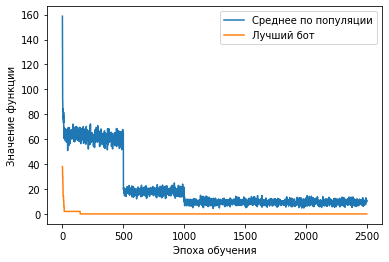

In [10]:
n = 100 # Общее число ботов
nsurv = 20 # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv # Количество новых (столько новых ботов создается)
epohs = 2500 # количество эпох
mut = 0.4 # коэфициент мутаций

# Длина бота(количество единиц груза) (Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0] 

popul = [] 
val = [] 

plotmeanval = [] 
plotminval = [] 
# Проходим по всей длине популяции
for i in range(n): 
    popul.append([]) 
    for j in range(l):
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs):
    if (it == 500): # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.1   
    if (it == 1000): # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.05  

    val = [] 
    for i in range(n): 
        bot = popul[i]
        trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0])
        for j in range(l):
            trainfill[bot[j]] += size[j]
        f = 0 # Обнуляем ошибку i-го бота 
        for t in range(trains):
            f += abs(train[t] - trainfill[t]) 
        val.append(f)
    # Добавляем в val значение ошибки для i-го бота    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0)
    print(it, " ", sum(val) / len(val), " ", sval[0:20])   
    plotmeanval.append(sum(val) / len(val)) 
    plotminval.append(sval[0])
    # Проходимся в цикле nnew-раз
    for i in range(nnew): 
        botp1, botp2 = getParents(newpopul, nsurv)
        newbot = []
        for j in range(l):
            x = crossPointFrom2Parents(botp1, botp2, j)
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x)     
        newpopul.append(newbot)   
    popul = newpopul

# построение графиков 
plt.plot(plotmeanval, label='Среднее по популяции')
plt.plot(plotminval, label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [11]:
# Выводим 20 лучших ботов
for i in range(20):
    print(popul[i])

[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
[5, 3, 0, 

In [12]:
bot = popul[0] # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot) # Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)

trainfill = np.zeros(trains, dtype = 'int32') # Массив заполненности поездов
for j in range(l): # Проходим по всей длине бота
    trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов по боту:', trainfill) # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train) # Выводим реальную вместимость поездов

Значения лучшего бота: [5, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 4, 4, 1, 4, 4]
Вместимость поездов по боту: [ 1 12 72  4 55  1]
Реальная вместимость поездов: [ 1 12 72  4 55  1]


Поезда: 10, 10, 10, 12, 12

Грузы: 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6

Расстановка грузов по поездам с дополнительным условием - надо заполнить поезда максимально равномерно, но можно не полностью,


In [13]:
# Вместимость каждого поезда
train = np.array([10, 10, 10, 12, 12, 12])
# Количество каждого груза (сумма грузов должна быть равна вместимости всех поездов (85=85))
size = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6]) 

print(train.sum())
print(size.sum())
print(train.shape)
print(size.shape)

66
54
(6,)
(18,)


0   29.033333333333335   [12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18]
1   27.513333333333332   [12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16]
2   27.2   [12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
3   26.606666666666666   [12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
4   26.553333333333335   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14]
5   26.80666666666667   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14]
6   27.313333333333333   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
7   28.2   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
8   26.313333333333333   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
9   27.153333333333332   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1

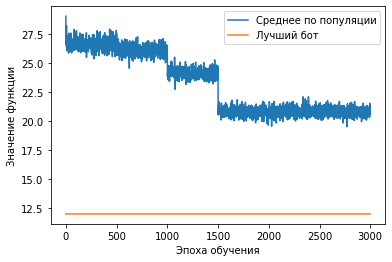

In [64]:
n = 300 # Общее число ботов
nsurv = 30 # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv # Количество новых (столько новых ботов создается)
epohs = 3000 # количество эпох
mut = 0.8 # коэфициент мутаций

# Длина бота(количество единиц груза) (Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0] 

popul = [] 
val = [] 

plotmeanval = [] 
plotminval = [] 
# Проходим по всей длине популяции
for i in range(n): 
    popul.append([]) 
    for j in range(l):
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs):
    if (it == 500): # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.7   
    if (it == 1000): # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.5  
    if (it == 1500): # Меняем коэфициет мутации после 1500-ой эпохи
        mut = 0.3 

    val = [] 
    for i in range(n): 
        bot = popul[i]
        trainfill = np.array([0, 0, 0, 0, 0, 0])
        for j in range(l):
            trainfill[bot[j]] += size[j]
        f = 0 # Обнуляем ошибку i-го бота 
        for t in range(trains):
            f += abs(train[t] - trainfill[t]) 
        val.append(f)
    # Добавляем в val значение ошибки для i-го бота    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0)
    print(it, " ", sum(val) / len(val), " ", sval[0:20])   
    plotmeanval.append(sum(val) / len(val)) 
    plotminval.append(sval[0])
    # Проходимся в цикле nnew-раз
    for i in range(nnew): 
        botp1, botp2 = getParents(newpopul, nsurv)
        newbot = []
        for j in range(l):
            x = crossPointFrom2Parents(botp1, botp2, j)
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x)     
        newpopul.append(newbot)   
    popul = newpopul

# построение графиков 
plt.plot(plotmeanval, label='Среднее по популяции')
plt.plot(plotminval, label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [65]:
# Выводим 20 лучших ботов
for i in range(20):
    print(popul[i])

[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
[0, 1, 2, 

In [66]:
bot = popul[0] # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot) # Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)

trainfill = np.zeros(trains, dtype = 'int32') # Массив заполненности поездов
for j in range(l): # Проходим по всей длине бота
    trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов по боту:', trainfill) # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train) # Выводим реальную вместимость поездов

Значения лучшего бота: [0, 1, 2, 1, 4, 3, 3, 1, 2, 0, 3, 0, 1, 4, 4, 5, 2, 5]
Вместимость поездов по боту: [ 7  8 10  7 11 11]
Реальная вместимость поездов: [10 10 10 12 12 12]


In [16]:
size

array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6])